# NonLinear with Full factorial

In [1]:
from typing import NamedTuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from doe_modules.design import DOE, FullFactorial
from doe_modules.preferences import kwarg_savefig, outputdir
from doe_modules.simulation import NonLinear, MLR

In [2]:
class Config(NamedTuple):
    savefig: bool = True
    out: str = outputdir
    design: DOE = FullFactorial
    run_names: list = None
    preffix: str = "ff_"

conf = Config()

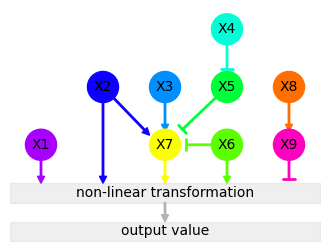

In [3]:
fig, ax = plt.subplots(figsize=(4, 3))

NonLinear().plot(ax=ax)

# if conf.savefig:
#     fig.savefig(f"{conf.out}/sim_model", **kwarg_savefig)

In [4]:
# fig, ax = plt.subplots(4, 3, figsize=(12, 12))

model = NonLinear()
model.simulate(
    design=conf.design, 
    # plot=True, ax=ax,
    # titles=conf.run_names
)

# fig.suptitle(f"{model.design().name} design", y=.93)

# if conf.savefig:
#     fig.savefig(f"{conf.out}/{conf.preffix}sim", **kwarg_savefig)

Text(0.5, 0.95, 'Full factorial design')

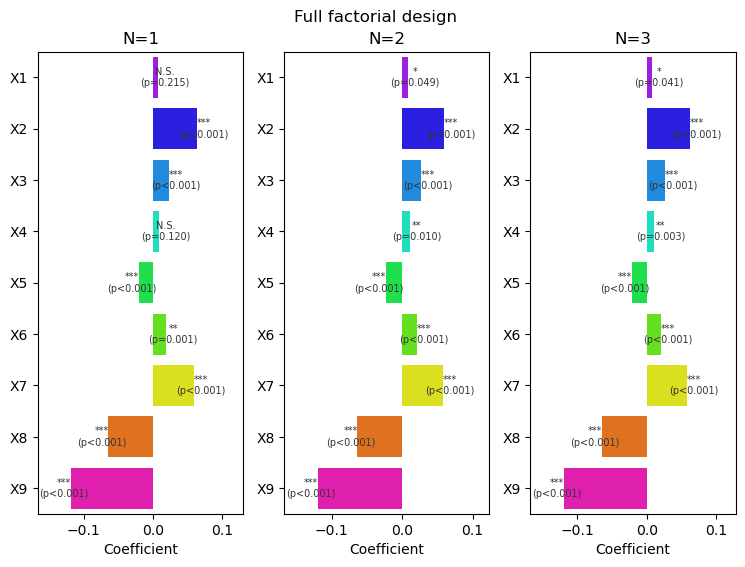

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(9, 6))

for i, a in enumerate(ax):
    model.simulate(n_rep=i + 1)
    mlr = MLR(model)
    mlr.plot(ax=a, anova=True, jitter_ratio=.05)

fig.suptitle(f"{model.metadata['design']} design", y=.95)

# if conf.savefig:
#     fig.savefig(f"{conf.out}/{conf.preffix}sim_mlr", **kwarg_savefig)

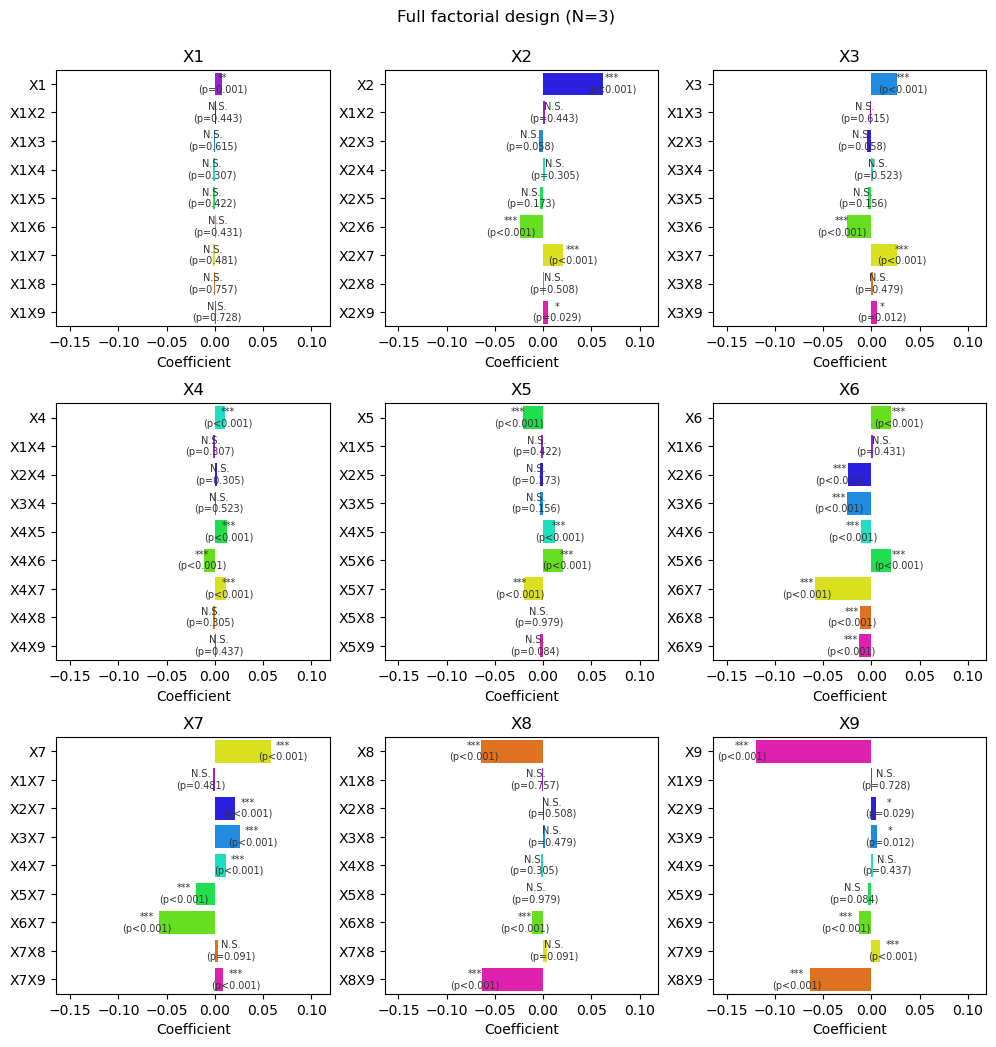

In [6]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=.3)

mlr = MLR(model, interactions=True)

for i, a in enumerate(ax.ravel()):
    cmap=model.cmap.copy()
    mlr.plot(ax=a, cmap=[cmap.pop(i)]+cmap, anova=True, regex=f"X{i + 1}", jitter_ratio=.1)
    a.set_title(f"X{i + 1}")

common_xlim = np.abs(
    np.array([a.get_xlim() for a in ax.ravel()])
).max(axis=0) * np.array([-1, 1])

[a.set_xlim(common_xlim) for a in ax.ravel()]

fig.suptitle(f"{model.metadata['design']} design (N={mlr.metadata['n_rep']})", y=.93);

# if conf.savefig:
#     fig.savefig(f"{conf.out}/{conf.preffix}sim_mlr_all", **kwarg_savefig)